In [23]:
set.seed(1234)

In [24]:
n <- 100
xx <- seq(0, 3*pi/4, len = n)
E <- rnorm(n, .5, .3)
f <- function(x) sin(x)
y <- f(xx) + E
head(cbind(xx, y)) 

xx,y
0.00000000,0.1378803
0.02379994,0.6070265
0.04759989,0.8729143
0.07139983,-0.1323701
0.09519978,0.7237934
0.11899972,0.7705358


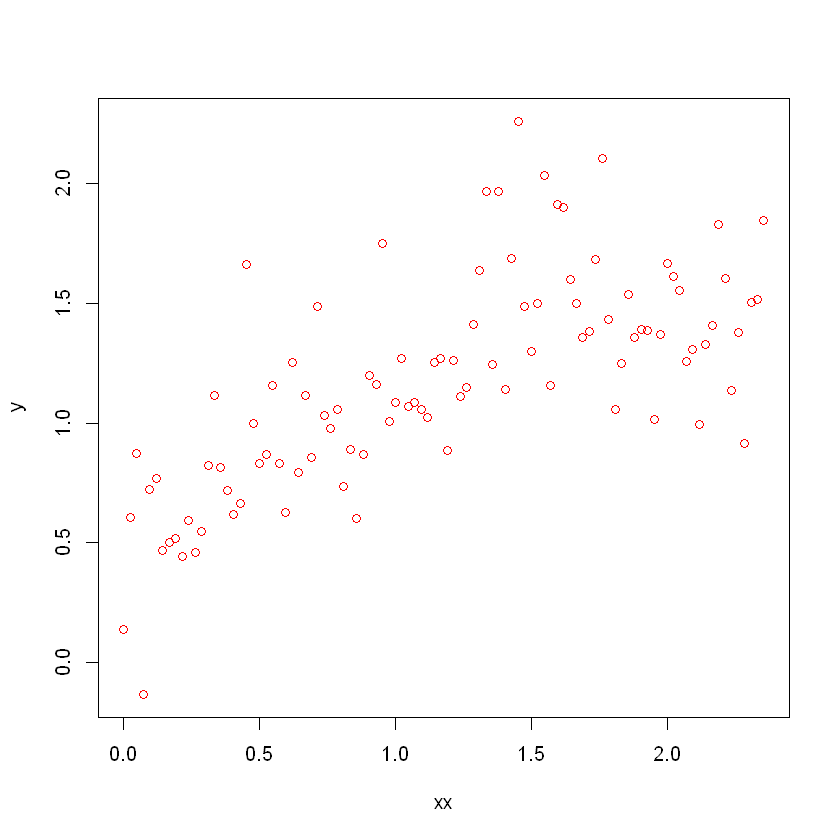

In [25]:
plot(x = xx, y = y, col = "red")

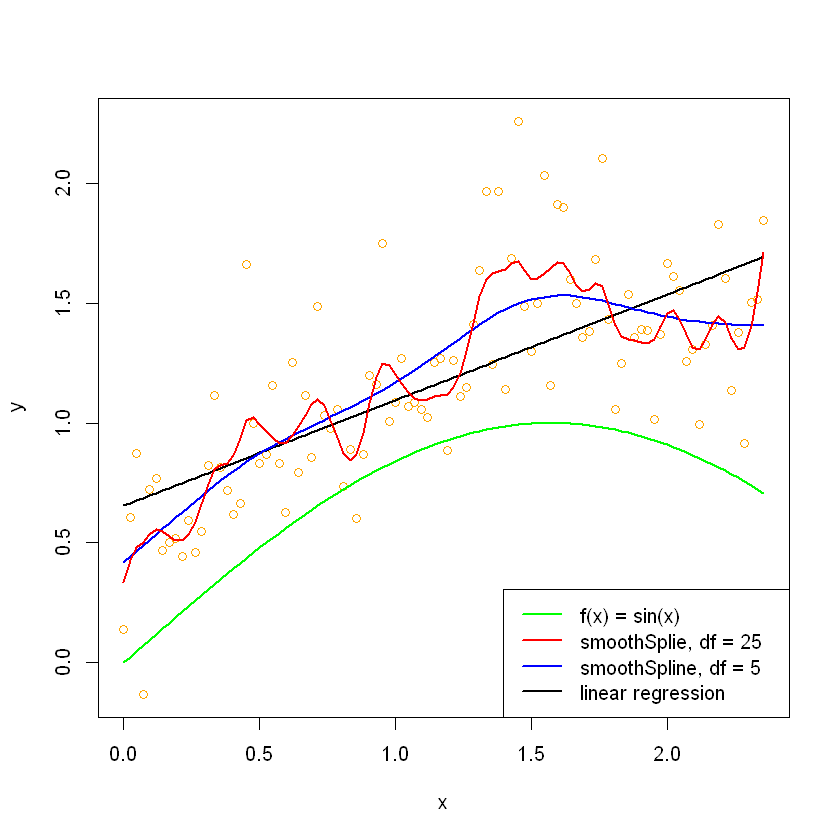

In [26]:
plot(x = xx, y = y, col = "orange", 
xlab = "x", ylab = "y")
linear_model <- lm(y ~ xx)
coeff <- coef(linear_model)
a <- coeff[1]; b <- coeff[2]
yhat_linear <- a + b * xx
lines(x = xx, y = yhat_linear, col = "black", lwd = 2)
yhat_spline1 <- smooth.spline(x = xx, y = y, 
df = 5, all.knots = TRUE)
yhat_spline2 <- smooth.spline(x = xx, y = y, 
df = 25, all.knots = TRUE)
lines(x = xx, y = yhat_spline1$y, col = "blue", lwd = 2)
lines(x = xx, y = yhat_spline2$y, col = "red", lwd = 2)
lines(x = xx, f(xx), col = "green", lwd = 2)
legend("bottomright", legend = c("f(x) = sin(x)", 
"smoothSplie, df = 25", 
"smoothSpline, df = 5", 
"linear regression"), 
col = c("green", "red", "blue", "black"), 
lty = 1, lwd = 2)


In [27]:
n_train <- round(n * .7)
ind_train <- sample(1:n, n_train)
x_train <- xx[ind_train]
y_train <- y[ind_train]
x_test <- xx[-ind_train]
y_test <- y[-ind_train]

In [28]:
mse_test <- c()
mse_train <- c()
for(i in 1:25){
    modeli <- lm(y_train ~ poly(x_train, degree = i))
    y_hat_train_i <- fitted(modeli)
    y_hat_test_i <- predict(modeli, data.frame(x_train = x_test))
    mse_train_i <- mean((y_train - y_hat_train_i)^2)
    mse_test_i <- mean((y_test - y_hat_test_i)^2)
    mse_train[i] <- mse_train_i
    mse_test[i] <- mse_test_i
}

In [29]:
MSE_min <- min(mse_test)

In [30]:
nn <- length(mse_test)
xxx <- 1:nn
curve_train <- loess(mse_train ~ xxx)
curve_test <- loess(mse_test ~ xxx)
ind_p <- c(1, 10, 21)
y_p_test <- curve_test$fitted[ind_p]
y_p_train <- curve_train$fitted[ind_p]

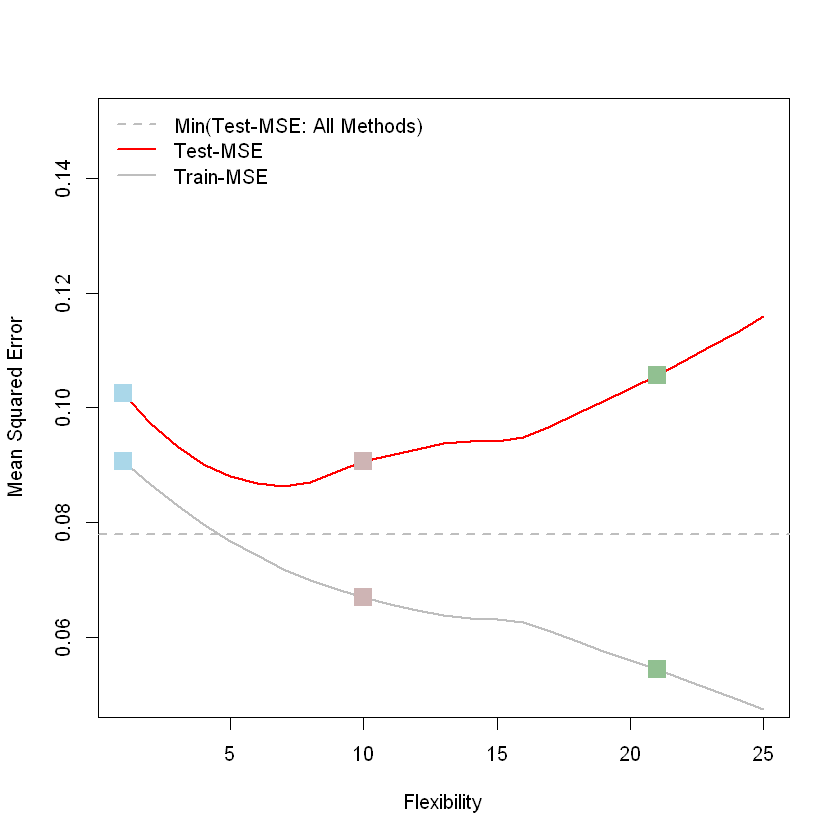

In [31]:

plot(predict(curve_train), col = "gray", type = "l", lwd = 2, 
ylim = c(0.05, .15), ylab = "Mean Squared Error", xlab = "Flexibility")
lines(predict(curve_test), col = "red", lwd = 2)
abline(h = MSE_min, lty = 2, col = "gray", lwd = 2)
points(x = ind_p, y = y_p_train, pch = 15, col = c("#aad7e9", 
"#ceb4b4", "#91c091"), cex = 2)
points(x = ind_p, y = y_p_test, pch = 15, col = c("#aad7e9", 
"#ceb4b4", "#91c091"), cex = 2)
legend("topleft", legend = c("Min(Test-MSE: All Methods)", "Test-MSE", 
"Train-MSE"), col = c("gray", "red", "gray"), 
lty = c(2, 1, 1), lwd = 2, bty = "n")